In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../../data/processed/Brazil/census_data/2010/weightening_area/universal_results/states/RS/'

In [3]:
categorie = 'Cor_e_Raca.csv'
data = pd.read_csv(path+categorie)
data.head()

,Cod_ap,CD_GEOCODM,NM_MUNICIP,V001,V002,V003,V004,V005,V006,V007,...,V245,V246,V247,V248,V249,V250,V251,Unnamed: 253,Unnamed: 157,Unnamed: 12
0,4.300034e+12,4300034,ACEGUÁ,4394,3533,338,33,489,1,228,...,6,0,26,2,0,12,0,0.0,0.0,0.0
1,4.300059e+12,4300059,ÁGUA SANTA,3722,3049,48,6,334,239,202,...,18,2,27,1,0,2,7,0.0,0.0,0.0
2,4.300109e+12,4300109,AGUDO,16722,14593,517,75,1534,3,732,...,22,0,74,3,0,7,0,0.0,0.0,0.0
3,4.300208e+12,4300208,AJURICABA,7255,6229,120,10,868,28,333,...,31,0,30,1,0,2,0,0.0,0.0,0.0
4,4.300307e+12,4300307,ALECRIM,7045,5828,104,20,1068,1,257,...,44,0,20,0,0,9,0,0.0,0.0,0.0


In [4]:
columns = data.columns.values
constant_columns = (data != data.iloc[0]).any() == False
columns[constant_columns].tolist()

['Unnamed: 253', 'Unnamed: 157', 'Unnamed: 12']

In [5]:
data_no_geo = data.drop(['Cod_ap', 'CD_GEOCODM', 'NM_MUNICIP'], axis=1)
sum(data_no_geo.duplicated())

0

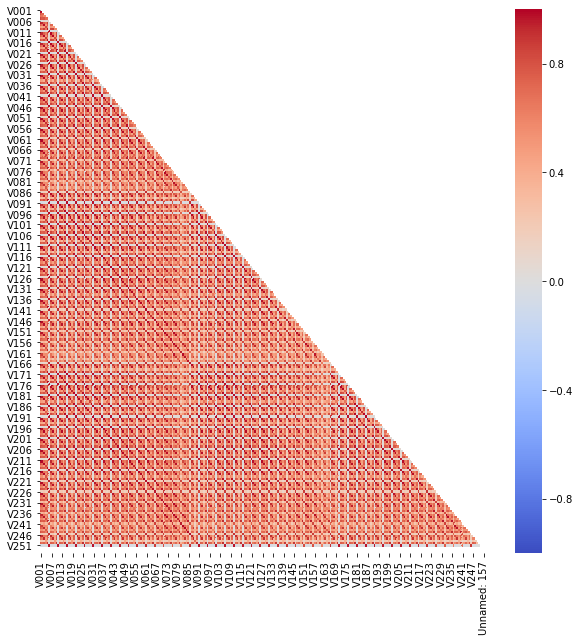

In [9]:
data_corr = data_no_geo.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(data_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);

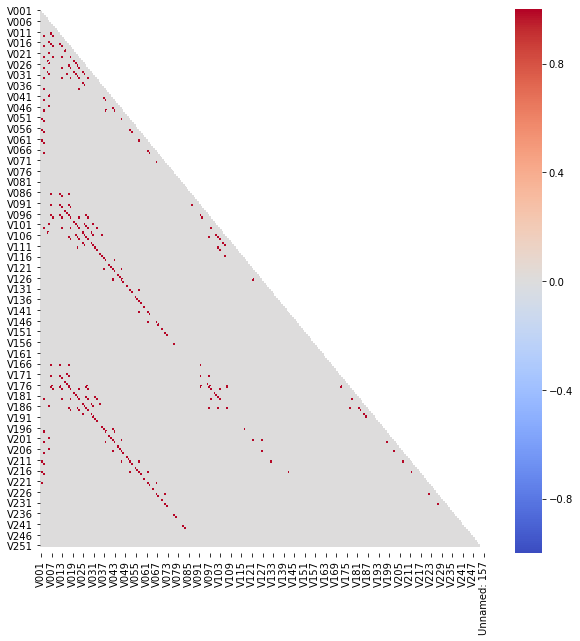

In [10]:
corr = data_corr.copy()
corr[np.abs(corr)<=0.99] = 0
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);

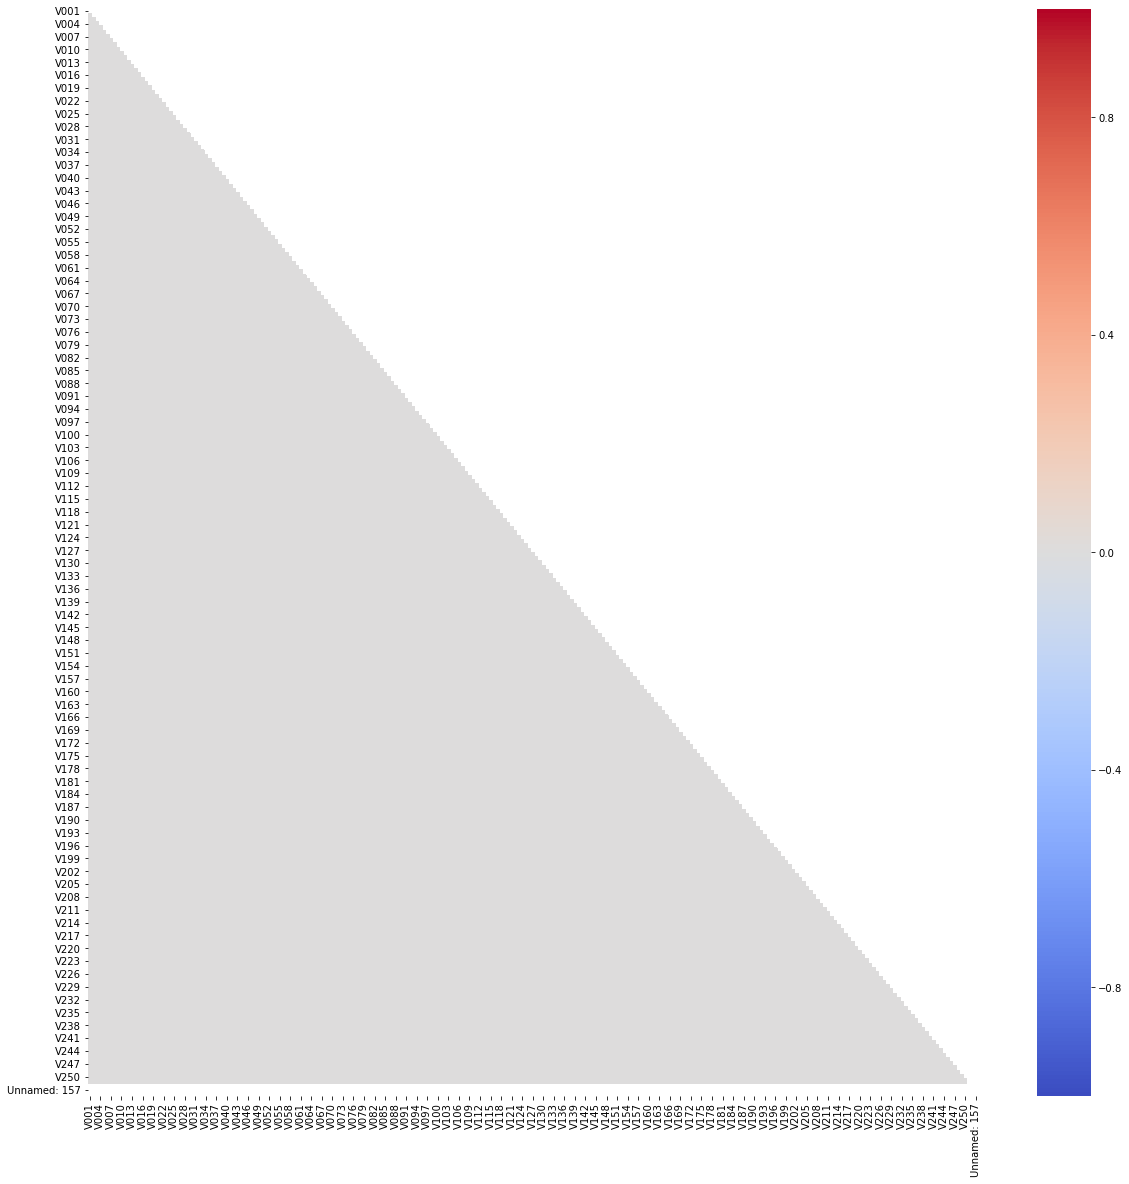

In [8]:
corr = data_corr.copy()
corr[np.abs(corr)< 1] = 0
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);